In [46]:
import pandas as pd
import os
import glob

In [47]:
data_path = r"C:\study material\guvi\project\CNC"

In [48]:
csv_files = sorted(glob.glob(os.path.join(data_path, "experiment_*.csv")))

print(f"✅ Found {len(csv_files)} experiment CSV files.")

✅ Found 18 experiment CSV files.


In [49]:
df_list = []
for i, file in enumerate(csv_files, start=1):
    try:
        df = pd.read_csv(file)
        df["No"] = i  
        df_list.append(df)
    except Exception as e:
        print(f"⚠️ Error reading {file}: {e}")

In [50]:
if df_list:
    merged_experiments = pd.concat(df_list, ignore_index=True)
    print("✅ Merging completed! Final dataset shape:", merged_experiments.shape)
else:
    raise ValueError("❌ No valid experiment CSVs found to merge.")

✅ Merging completed! Final dataset shape: (25286, 49)


In [51]:
data_output_path = os.path.join(data_path, "merged_experiments.csv")
merged_experiments.to_csv(data_output_path, index=False)
print("✅ Merged experiment data saved to:", data_output_path)

✅ Merged experiment data saved to: C:\study material\guvi\project\CNC\merged_experiments.csv


In [52]:
train_data_path = os.path.join(data_path, "train.csv")
train_data = pd.read_csv(train_data_path)

In [53]:
if "No" not in train_data.columns:
    raise ValueError("❌ Column 'No' not found in train.csv!")

In [54]:
train_data['No'] = train_data['No'].astype(int)
print("✅ Train data loaded! Shape:", train_data.shape)

✅ Train data loaded! Shape: (18, 7)


In [55]:
train_data['passed_visual_inspection'] = train_data['passed_visual_inspection'].fillna('no')
print("✅ Missing values handled in train.csv")

✅ Missing values handled in train.csv


In [56]:
merged_experiments['No'] = merged_experiments['No'].astype(int)

In [57]:
final_data = pd.merge(merged_experiments, train_data, on='No', how='left')
print("✅ Final merged dataset shape:", final_data.shape)


✅ Final merged dataset shape: (25286, 55)


In [58]:
missing_values = final_data.isnull().sum()
print("✅ Missing values in final dataset:\n", missing_values[missing_values > 0])

✅ Missing values in final dataset:
 Series([], dtype: int64)


In [59]:
object_columns = final_data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values in column '{col}':", final_data[col].unique())


Unique values in column 'Machining_Process': ['Starting' 'Prep' 'Layer 1 Up' 'Layer 1 Down' 'Repositioning'
 'Layer 2 Up' 'Layer 2 Down' 'Layer 3 Up' 'Layer 3 Down' 'end' 'End']

Unique values in column 'material': ['wax']

Unique values in column 'tool_condition': ['unworn' 'worn']

Unique values in column 'machining_finalized': ['yes' 'no']

Unique values in column 'passed_visual_inspection': ['yes' 'no']


In [60]:
final_data['tool_condition'] = final_data['tool_condition'].map({'unworn': 0, 'worn': 1})
final_data['machining_finalized'] = final_data['machining_finalized'].map({'no': 0, 'yes': 1})
final_data['passed_visual_inspection'] = final_data['passed_visual_inspection'].map({'no': 0, 'yes': 1})

# Drop 'material' column (since it has only one value)
if 'material' in final_data.columns:
    final_data.drop(columns=['material'], inplace=True)
    print("✅ Dropped 'material' column as it has only one unique value.")

✅ Dropped 'material' column as it has only one unique value.


In [61]:
object_columns = final_data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values in column '{col}':", final_data[col].unique())


Unique values in column 'Machining_Process': ['Starting' 'Prep' 'Layer 1 Up' 'Layer 1 Down' 'Repositioning'
 'Layer 2 Up' 'Layer 2 Down' 'Layer 3 Up' 'Layer 3 Down' 'end' 'End']


In [62]:
from sklearn.preprocessing import LabelEncoder

final_data['Machining_Process'] = final_data['Machining_Process'].str.lower()

# Group similar stages
process_mapping = {
    'layer 1 up': 'layer up', 'layer 2 up': 'layer up', 'layer 3 up': 'layer up',
    'layer 1 down': 'layer down', 'layer 2 down': 'layer down', 'layer 3 down': 'layer down',
    'end': 'end'
}
final_data['Machining_Process'] = final_data['Machining_Process'].replace(process_mapping)

# Label encode 'Machining_Process'
label_encoder = LabelEncoder()
final_data['Machining_Process'] = label_encoder.fit_transform(final_data['Machining_Process'])
print("✅ 'Machining_Process' encoded with Label Encoding.")

✅ 'Machining_Process' encoded with Label Encoding.


In [63]:
object_columns = final_data.select_dtypes(include=['object']).columns
for col in object_columns:
    print(f"\nUnique values in column '{col}':", final_data[col].unique())

In [64]:
final_data_output_path = os.path.join(data_path, "final_data.csv")
final_data.to_csv(final_data_output_path, index=False)
print("✅ Final merged dataset saved to:", final_data_output_path)


✅ Final merged dataset saved to: C:\study material\guvi\project\CNC\final_data.csv


In [65]:
final_data.shape

(25286, 54)

In [66]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data_path = r"C:\study material\guvi\project\CNC"
final_data_path = os.path.join(data_path, "final_data.csv")


final_data = pd.read_csv(final_data_path)
print("✅ Final data loaded! Shape:", final_data.shape)

✅ Final data loaded! Shape: (25286, 54)


1️⃣ Basic Data Overview

In [68]:
print("\n🔹 Dataset Info:")
print(final_data.info())



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25286 entries, 0 to 25285
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   X1_ActualPosition          25286 non-null  float64
 1   X1_ActualVelocity          25286 non-null  float64
 2   X1_ActualAcceleration      25286 non-null  float64
 3   X1_CommandPosition         25286 non-null  float64
 4   X1_CommandVelocity         25286 non-null  float64
 5   X1_CommandAcceleration     25286 non-null  float64
 6   X1_CurrentFeedback         25286 non-null  float64
 7   X1_DCBusVoltage            25286 non-null  float64
 8   X1_OutputCurrent           25286 non-null  float64
 9   X1_OutputVoltage           25286 non-null  float64
 10  X1_OutputPower             25286 non-null  float64
 11  Y1_ActualPosition          25286 non-null  float64
 12  Y1_ActualVelocity          25286 non-null  float64
 13  Y1_ActualAcceleration      25

In [69]:
print("\n🔹 Checking for missing values:")
print(final_data.isnull().sum().sum(), "missing values found.")


🔹 Checking for missing values:
0 missing values found.


In [70]:
print("\n🔹 Unique values in categorical columns:")
categorical_columns = ['tool_condition', 'machining_finalized', 'passed_visual_inspection', 'Machining_Process']
for col in categorical_columns:
    print(f"{col}: {final_data[col].unique()}")


🔹 Unique values in categorical columns:
tool_condition: [0 1]
machining_finalized: [1 0]
passed_visual_inspection: [1 0]
Machining_Process: [5 3 2 1 4 0]


 2️⃣ Summary Statistics & Distributions

In [71]:
print("\n🔹 Summary statistics:")
print(final_data.describe())



🔹 Summary statistics:
       X1_ActualPosition  X1_ActualVelocity  X1_ActualAcceleration  \
count       25286.000000       25286.000000           25286.000000   
mean          159.052045          -0.288657               0.094264   
std            19.330873           5.658260              93.877623   
min           141.000000         -20.400000           -1280.000000   
25%           145.000000          -2.050000             -31.300000   
50%           153.000000           0.000000               0.000000   
75%           162.000000           0.200000              25.000000   
max           198.000000          50.700000            1440.000000   

       X1_CommandPosition  X1_CommandVelocity  X1_CommandAcceleration  \
count        25286.000000        25286.000000            25286.000000   
mean           159.050700           -0.283076                0.253215   
std             19.331144            5.664309               72.594951   
min            141.000000          -20.000000         

<Figure size 1500x800 with 0 Axes>

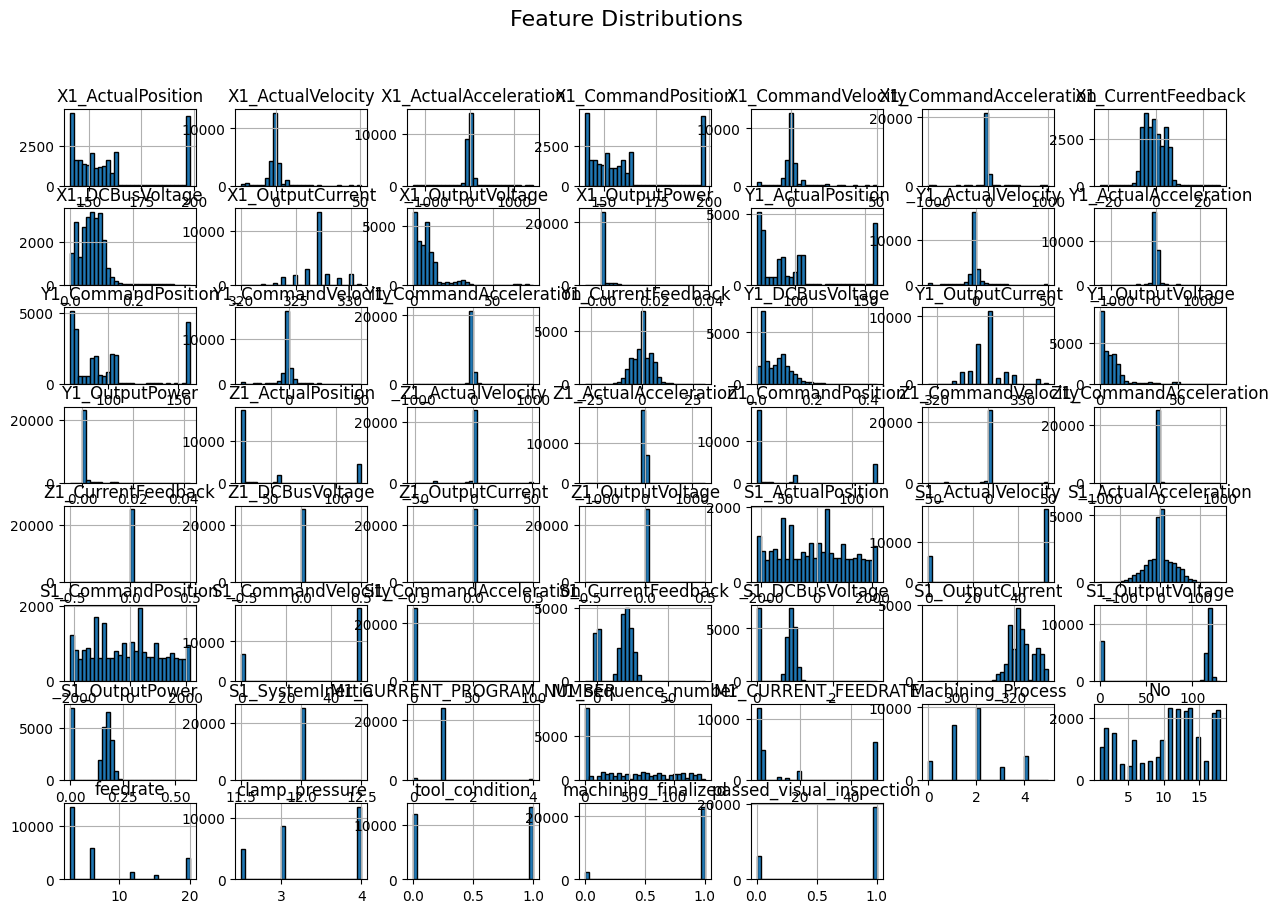

In [72]:
plt.figure(figsize=(15, 8))
final_data.hist(figsize=(15, 10), bins=30, edgecolor='k')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()

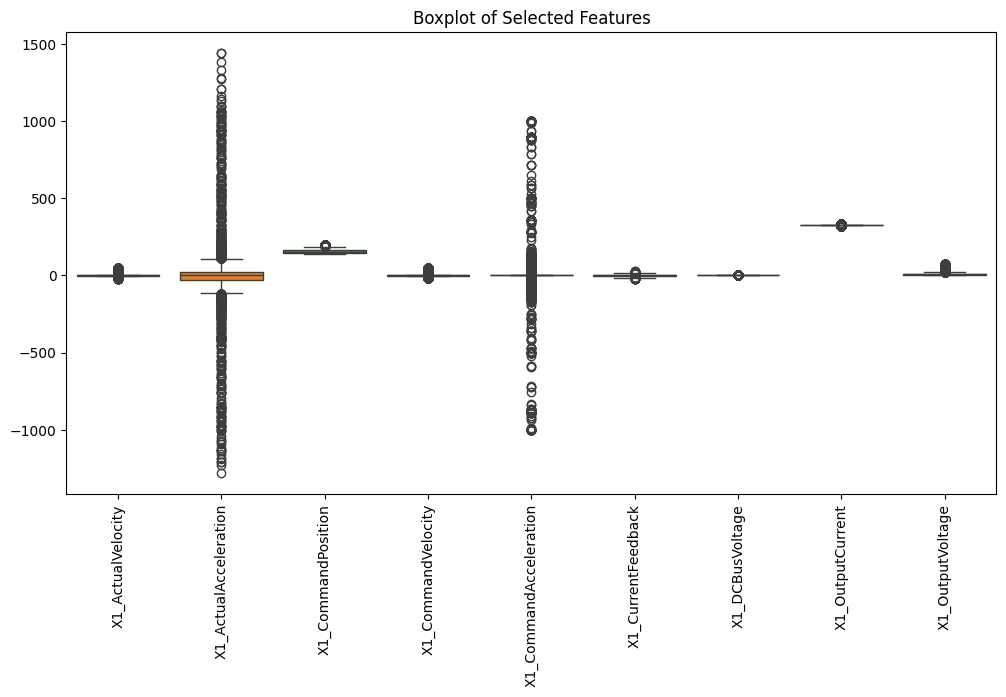

In [73]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_data.iloc[:, 1:10])  # First 10 numeric columns
plt.xticks(rotation=90)
plt.title("Boxplot of Selected Features")
plt.show()

3️⃣ Correlation Analysis

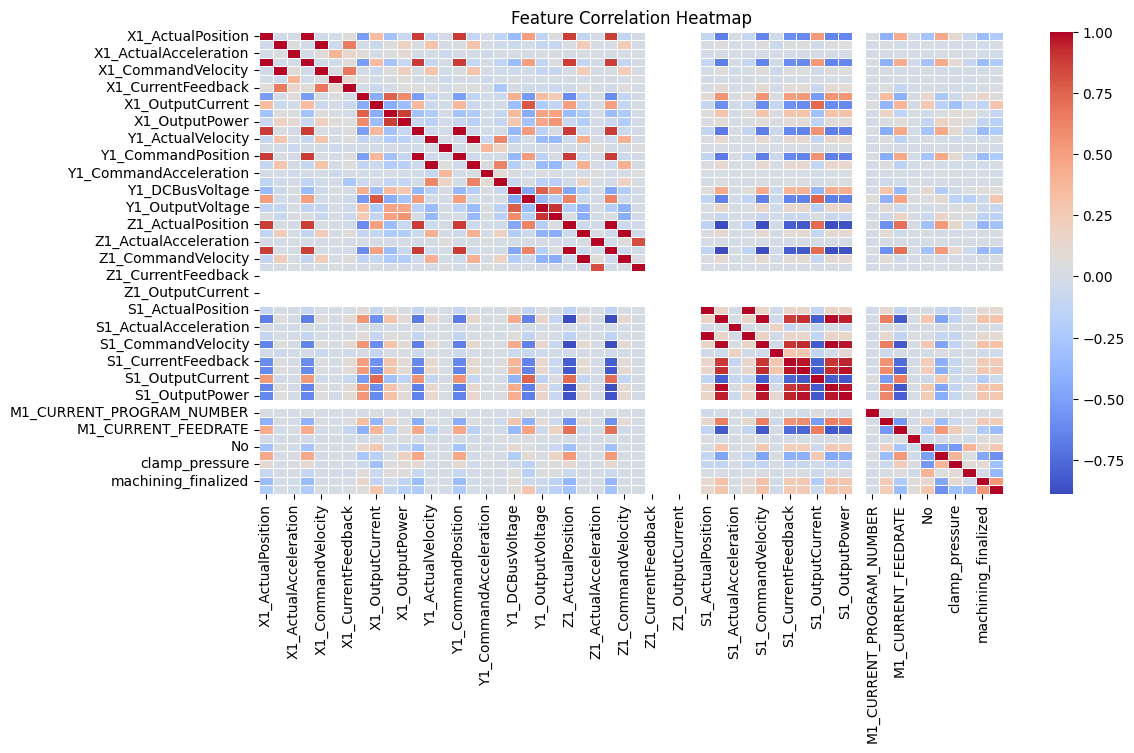

In [74]:
plt.figure(figsize=(12, 6))
corr_matrix = final_data.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


4️⃣ Time-Series Sensor Analysi

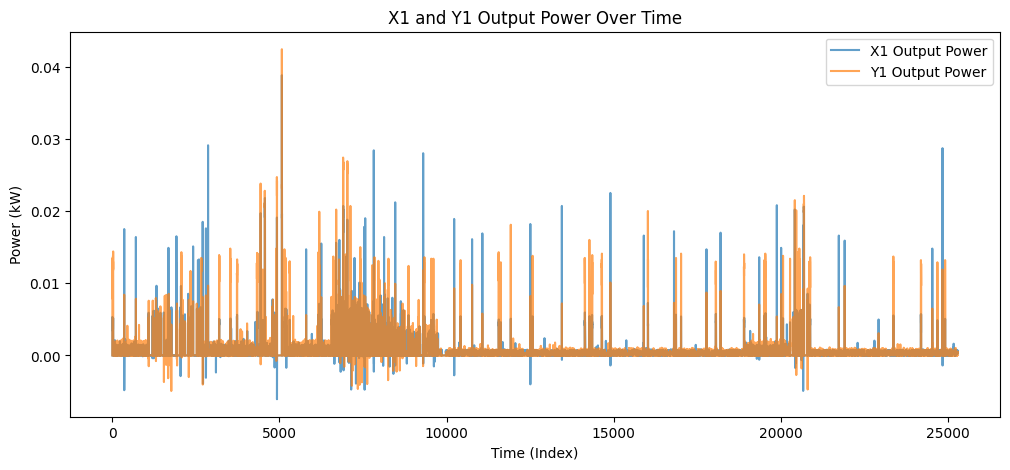

In [75]:
plt.figure(figsize=(12, 5))
plt.plot(final_data["X1_OutputPower"], label='X1 Output Power', alpha=0.7)
plt.plot(final_data["Y1_OutputPower"], label='Y1 Output Power', alpha=0.7)
plt.xlabel("Time (Index)")
plt.ylabel("Power (kW)")
plt.title("X1 and Y1 Output Power Over Time")
plt.legend()
plt.show()


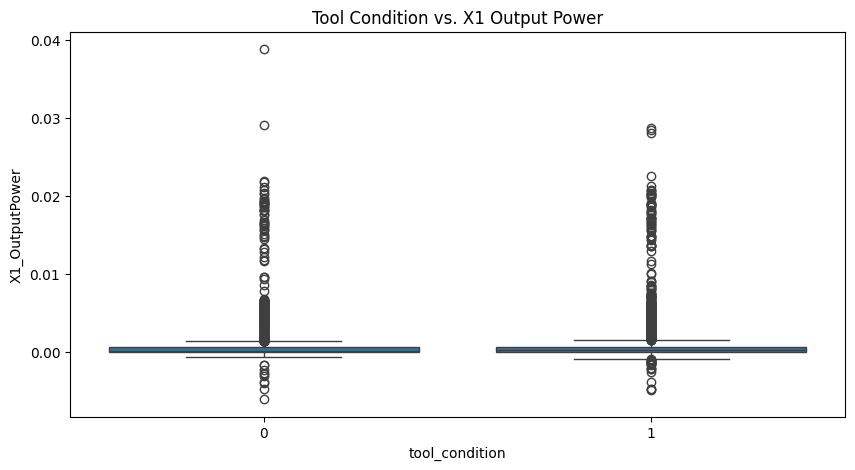

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='tool_condition', y='X1_OutputPower', data=final_data)
plt.title("Tool Condition vs. X1 Output Power")
plt.show()

In [77]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [78]:
data_path = r"C:\study material\guvi\project\CNC"
final_data_path = os.path.join(data_path, "final_data.csv")

In [79]:
final_data = pd.read_csv(final_data_path)
print("✅ Final data loaded! Shape:", final_data.shape)


✅ Final data loaded! Shape: (25286, 54)


In [80]:
columns_to_drop = ['No', 'material']
final_data = final_data.drop(columns=columns_to_drop, errors='ignore')
print("✅ Dropped unnecessary columns. New shape:", final_data.shape)

✅ Dropped unnecessary columns. New shape: (25286, 53)


In [81]:
numerical_columns = final_data.select_dtypes(include=['float64', 'int64']).columns
lower_bound = final_data[numerical_columns].quantile(0.01)
upper_bound = final_data[numerical_columns].quantile(0.99)
final_data[numerical_columns] = final_data[numerical_columns].clip(lower=lower_bound, upper=upper_bound, axis=1)
print("✅ Capped extreme values instead of removing them.")

✅ Capped extreme values instead of removing them.


In [82]:
final_data.fillna(final_data.median(), inplace=True)
print("✅ Handled missing values.")

✅ Handled missing values.


In [83]:
final_data.shape

(25286, 53)

In [84]:
scaler = MinMaxScaler()
numerical_columns = final_data.select_dtypes(include=['float64', 'int64']).columns
final_data[numerical_columns] = scaler.fit_transform(final_data[numerical_columns])
print("✅ Normalized numerical features.")


✅ Normalized numerical features.


In [85]:
processed_data_path = os.path.join(data_path, "processed_data.csv")
final_data.to_csv(processed_data_path, index=False)
print("✅ Feature Engineering Completed! Processed data saved.")


✅ Feature Engineering Completed! Processed data saved.


In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [87]:
# Load the processed dataset
data_path = r"C:\study material\guvi\project\CNC\processed_data.csv"
df = pd.read_csv(data_path)

print("✅ Data Loaded! Shape:", df.shape)


✅ Data Loaded! Shape: (25286, 53)


In [88]:
X = df.drop(columns=['tool_condition', 'machining_finalized', 'passed_visual_inspection']) 
y = df[['tool_condition', 'machining_finalized', 'passed_visual_inspection']] 

In [89]:
X_reshaped = X.values.reshape((X.shape[0], 1, X.shape[1]))

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [91]:
print("✅ Data Prepared! Shapes:", X_train.shape, y_train.shape)

✅ Data Prepared! Shapes: (20228, 1, 50) (20228, 3)


In [92]:
model = Sequential([
    Bidirectional(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))),
    BatchNormalization(),
    Dropout(0.3),

    Bidirectional(LSTM(64, return_sequences=True)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(32),
    Dropout(0.3),

    Dense(3, activation='sigmoid')  
])

C:\Users\vicky\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [93]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [94]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [95]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])


Epoch 1/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3938 - loss: 0.4168 - val_accuracy: 0.4658 - val_loss: 0.2860
Epoch 2/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4324 - loss: 0.2460 - val_accuracy: 0.5065 - val_loss: 0.1828
Epoch 3/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.4381 - loss: 0.2121 - val_accuracy: 0.5057 - val_loss: 0.1670
Epoch 4/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4550 - loss: 0.1904 - val_accuracy: 0.4960 - val_loss: 0.1502
Epoch 5/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4435 - loss: 0.1842 - val_accuracy: 0.5192 - val_loss: 0.1465
Epoch 6/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4590 - loss: 0.1802 - val_accuracy: 0.4684 - val_loss: 0.1366
Epoch 7/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4570 - loss: 0.1635 - val_accuracy: 0.5091 - val_loss: 0.1282
Epoch 8/50
633/633 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4599 - loss: 0.1574 - val_accuracy: 0

In [96]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5056 - loss: 0.0949
✅ Model Accuracy: 50.73%


In [97]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary labels

# Compare predictions with actual values
predictions_df = pd.DataFrame(y_pred, columns=['Predicted_Tool_Condition', 'Predicted_Machining_Completed', 'Predicted_Passed_Visual_Inspection'])
actual_df = pd.DataFrame(y_test.values, columns=['Actual_Tool_Condition', 'Actual_Machining_Completed', 'Actual_Passed_Visual_Inspection'])

# Show first 10 results
final_comparison = pd.concat([predictions_df, actual_df], axis=1)
print(final_comparison.head(10))


159/159 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
   Predicted_Tool_Condition  Predicted_Machining_Completed  \
0                         1                              1   
1                         1                              1   
2                         1                              1   
3                         0                              1   
4                         1                              1   
5                         0                              1   
6                         1                              1   
7                         0                              1   
8                         0                              1   
9                         0                              1   

   Predicted_Passed_Visual_Inspection  Actual_Tool_Condition  \
0                                   1                    1.0   
1                                   1                    1.0   
2                                   1                    1.0   
3                   

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Extract actual and predicted values
y_actual = y_test.values
y_pred = model.predict(X_test)  # Assuming 'model' is your trained LSTM model
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary values

# Compute evaluation metrics for each target variable
for i, label in enumerate(['Tool Condition', 'Machining Completed', 'Passed Visual Inspection']):
    print(f"\n🔹 {label} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_actual[:, i], y_pred[:, i]):.4f}")
    print(f"Precision: {precision_score(y_actual[:, i], y_pred[:, i]):.4f}")
    print(f"Recall: {recall_score(y_actual[:, i], y_pred[:, i]):.4f}")
    print(f"F1-Score: {f1_score(y_actual[:, i], y_pred[:, i]):.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_actual[:, i], y_pred[:, i]))


159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

🔹 Tool Condition Evaluation:
Accuracy: 0.8551
Precision: 0.8439
Recall: 0.8914
F1-Score: 0.8670
Confusion Matrix:
 [[1936  442]
 [ 291 2389]]

🔹 Machining Completed Evaluation:
Accuracy: 0.9998
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
Confusion Matrix:
 [[ 447    1]
 [   0 4610]]

🔹 Passed Visual Inspection Evaluation:
Accuracy: 0.9943
Precision: 0.9963
Recall: 0.9961
F1-Score: 0.9962
Confusion Matrix:
 [[1220   14]
 [  15 3809]]


In [99]:
model.save("cnc_lstm_model.h5")
print("✅ Model saved successfully!")

✅ Model saved successfully!


In [101]:
import pandas as pd

# Load training data (replace with actual path)
train_df = pd.read_csv("train.csv")  # Load your original training dataset
uploaded_df = pd.read_csv("experiment_01.csv")  # Load new experiment file

# Get feature names
train_features = set(train_df.columns)
uploaded_features = set(uploaded_df.columns)

# Find missing and extra features
missing_features = train_features - uploaded_features
extra_features = uploaded_features - train_features

print("❌ Missing Features in Uploaded File:", missing_features)
print("⚠️ Extra Features in Uploaded File:", extra_features)


❌ Missing Features in Uploaded File: {'No', 'clamp_pressure', 'tool_condition', 'passed_visual_inspection', 'material', 'machining_finalized', 'feedrate'}
⚠️ Extra Features in Uploaded File: {'X1_ActualVelocity', 'S1_ActualPosition', 'Y1_DCBusVoltage', 'X1_ActualAcceleration', 'M1_CURRENT_PROGRAM_NUMBER', 'X1_OutputVoltage', 'X1_CommandPosition', 'Y1_CommandAcceleration', 'Z1_ActualPosition', 'Y1_OutputPower', 'S1_DCBusVoltage', 'S1_OutputCurrent', 'M1_CURRENT_FEEDRATE', 'Y1_ActualPosition', 'Z1_OutputVoltage', 'S1_CommandAcceleration', 'Y1_CommandPosition', 'X1_OutputPower', 'X1_OutputCurrent', 'Y1_OutputVoltage', 'Z1_OutputCurrent', 'X1_ActualPosition', 'S1_CommandVelocity', 'Y1_OutputCurrent', 'S1_ActualVelocity', 'Z1_ActualVelocity', 'Z1_ActualAcceleration', 'Z1_CommandAcceleration', 'S1_CurrentFeedback', 'X1_CommandVelocity', 'S1_OutputVoltage', 'X1_CommandAcceleration', 'S1_ActualAcceleration', 'S1_SystemInertia', 'Z1_CurrentFeedback', 'Y1_ActualAcceleration', 'S1_CommandPosition